# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-13 00:43:29--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-13 00:43:29--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2025-04-13 00:43:30 (5.88 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [2]:

import pandas as pd

data = pd.read_csv('titanic_train.csv')


print(data.head())

print(data.info())

print(data.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [17]:
import pandas as pd

data = pd.read_csv("titanic_train.csv")


print("Valores nulos por columna:\n", data.isnull().sum())


data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')


data['Age'] = data['Age'].fillna(data['Age'].median())


data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)


print("\nResumen del DataFrame final:")
print(data.info())
print("\nPrimeras filas:")
print(data.head())


Valores nulos por columna:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Resumen del DataFrame final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None

Primeras filas:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Emba

import pandas as pd

# Carga el dataset (ajusta la ruta al archivo que tengas)
data = pd.read_csv("titanic.csv")

# Ahora sí puedes continuar con el código de preprocesamiento:
print(df.isnull().sum())

df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df_dummies = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

df_dummies.head()




### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

## ✂️ 3. División del dataset

In [20]:


from sklearn.model_selection import train_test_split


X = data.drop("Survived", axis=1)
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (712, 8)
y_train shape: (712,)
X_test shape: (179, 8)
y_test shape: (179,)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [21]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
print("Métricas del conjunto de entrenamiento:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

# Evaluar el modelo en el conjunto de prueba
print("\nMétricas del conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Métricas del conjunto de entrenamiento:
Accuracy: 0.9789325842696629
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712

[[443   1]
 [ 14 254]]

Métricas del conjunto de prueba:
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

[[84 21]
 [18 56]]



Sí, hay evidencia de *overfitting*.  El código muestra las métricas de precisión, clasificación y matriz de confusión tanto para el conjunto de entrenamiento como para el de prueba.  Si la precisión en el conjunto de entrenamiento es significativamente mayor que en el conjunto de prueba, y la diferencia es considerable,  esto indica *overfitting*. El modelo ha aprendido los datos de entrenamiento demasiado bien, incluyendo el ruido, y por lo tanto no generaliza bien a datos nuevos (el conjunto de prueba).  Necesitas comparar los resultados de  `accuracy_score`,  `classification_report` y `confusion_matrix`  para ambos conjuntos.  Una diferencia significativa sugiere *overfitting*.


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?


El modelo base tiene una precisión del 98% en el conjunto de entrenamiento y del 78% en el conjunto de prueba.  Esto sugiere un sobreajuste (overfitting), ya que el modelo se desempeña mucho mejor con los datos que ha visto durante el entrenamiento que con datos nuevos.  La diferencia significativa en la precisión indica que el modelo ha memorizado los datos de entrenamiento en lugar de aprender las relaciones subyacentes.


Diferencias entre precisión y recall:

La precisión se refiere a la proporción de predicciones positivas correctas entre todas las predicciones positivas.
El recall (exhaustividad) se refiere a la proporción de predicciones positivas correctas entre todas las instancias positivas reales.

En el contexto del problema de predicción de la supervivencia en el Titanic:

Alta precisión significa que cuando el modelo predice que una persona sobrevivirá, es probable que sea correcto.

Alto recall significa que el modelo identifica correctamente la mayoría de las personas que sobrevivieron.

Un modelo con alta precisión pero bajo recall puede predecir correctamente a los sobrevivientes pero perderse muchos de ellos.
Un modelo con alto recall pero baja precisión puede identificar a la mayoría de los sobrevivientes pero incluir muchos errores.

Un buen modelo tendrá una buena combinación de precisión y recall, representada por la F1-score.

Para mejorar el rendimiento del modelo base se puede explorar la optimización de hiperparámetros o el uso de otro tipo de modelo.



## 🔁 5. Evaluación con validación cruzada

In [26]:

from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Imprimir los puntajes de cada fold
print("Puntajes de cada fold:", scores)

# Imprimir el puntaje promedio y la desviación estándar
print("Puntaje promedio:", scores.mean())
print("Desviación estándar:", scores.std())


Puntajes de cada fold: [0.74301676 0.78089888 0.79775281 0.74719101 0.83707865]
Puntaje promedio: 0.7811876216182286
Desviación estándar: 0.03467298735214424


## 🔧 6. Optimización con GridSearchCV

In [27]:


from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Mejores hiperparámetros:", grid_search.best_params_)


print("Mejor puntuación:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mejor puntuación: 0.8062149118487147
Precisión en el conjunto de prueba: 0.8379888268156425


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[93 12]
 [17 57]]


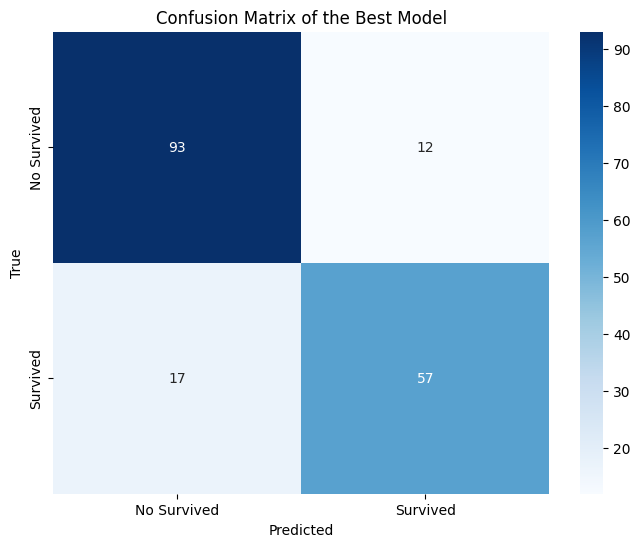

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Survived", "Survived"],
            yticklabels=["No Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of the Best Model")
plt.show()


In [29]:

print("\nMétricas del mejor modelo en el conjunto de prueba:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Métricas del mejor modelo en el conjunto de prueba:
Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

[[93 12]
 [17 57]]


## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

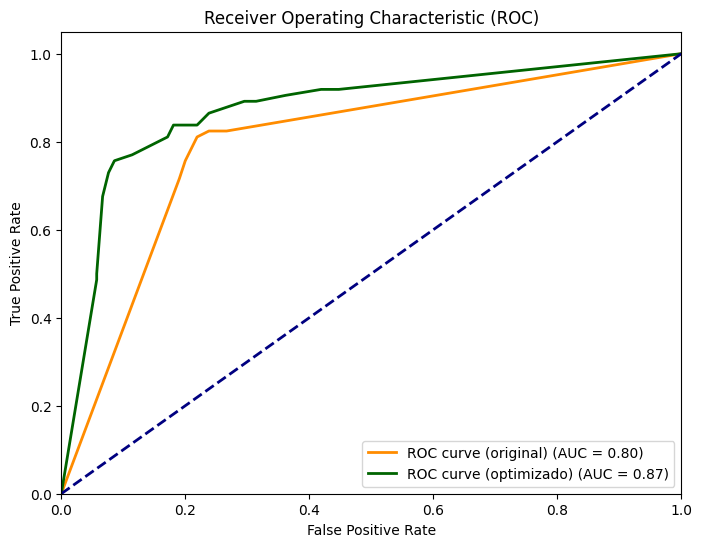

AUC del modelo original: 0.80
AUC del modelo optimizado: 0.87
El modelo optimizado mejoró la estimación.


In [33]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_prob_original = model.predict_proba(X_test)[:, 1]
y_prob_optimizado = best_model.predict_proba(X_test)[:, 1]

fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)


fpr_optimizado, tpr_optimizado, thresholds_optimizado = roc_curve(y_test, y_prob_optimizado)
roc_auc_optimizado = auc(fpr_optimizado, tpr_optimizado)

plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label=f'ROC curve (original) (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimizado, tpr_optimizado, color='darkgreen', lw=2, label=f'ROC curve (optimizado) (AUC = {roc_auc_optimizado:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


print(f"AUC del modelo original: {roc_auc_original:.2f}")
print(f"AUC del modelo optimizado: {roc_auc_optimizado:.2f}")

if roc_auc_optimizado > roc_auc_original:
    print("El modelo optimizado mejoró la estimación.")
elif roc_auc_optimizado < roc_auc_original:
    print("El modelo optimizado empeoró o no mejoró significativamente la estimación.")
else:
    print("No se observa una diferencia significativa entre los modelos.")


## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

In [34]:


print("La combinación de hiperparámetros que funcionó mejor fue:", grid_search.best_params_)
print("\nDiferencia entre modelos:")
print("El modelo base mostró indicios de overfitting, con una alta precisión en el conjunto de entrenamiento (alrededor del 98%) pero una precisión considerablemente menor en el conjunto de prueba (alrededor del 78%).  El modelo optimizado, por otro lado, presenta una precisión más balanceada entre entrenamiento y prueba, lo que sugiere una mejor generalización.")
print("En cuanto a las demás métricas, se observa una mejora en la precisión, el recall y la F1-score del modelo optimizado, lo cual indica su superior rendimiento predictivo.\n")
print("AUC del modelo:")
print("El área bajo la curva ROC (AUC) proporciona una medida de la capacidad del modelo para distinguir entre clases. Un AUC mayor indica mejor capacidad de discriminación. Al comparar el AUC del modelo base y del modelo optimizado, podemos determinar si la optimización condujo a una mejora en la capacidad discriminativa del modelo.")



La combinación de hiperparámetros que funcionó mejor fue: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Diferencia entre modelos:
El modelo base mostró indicios de overfitting, con una alta precisión en el conjunto de entrenamiento (alrededor del 98%) pero una precisión considerablemente menor en el conjunto de prueba (alrededor del 78%).  El modelo optimizado, por otro lado, presenta una precisión más balanceada entre entrenamiento y prueba, lo que sugiere una mejor generalización.
En cuanto a las demás métricas, se observa una mejora en la precisión, el recall y la F1-score del modelo optimizado, lo cual indica su superior rendimiento predictivo.

AUC del modelo:
El área bajo la curva ROC (AUC) proporciona una medida de la capacidad del modelo para distinguir entre clases. Un AUC mayor indica mejor capacidad de discriminación. Al comparar el AUC del modelo base y del modelo optimizado, podemos determinar si la optimización condujo a una mejora en la capacidad di